# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira fornece cartões de crédito para clientes, porém precisa medir de alguma forma o risco de inadimplência desses clientes - a instituição precisa saber se é seguro ou não fornecer o cartão para o cliente, ou seja, qual o risco desse cliente não pagar o que deve.

No momento em que o cliente solicita o cartão, a instituição pede alguns dados para que ocorra a avaliação de crédito. A partir desses dados, a empresa quer construir um modelo preditivo para renda e identificar o risco de inadimplência, para ser usado com futuros clientes. Dessa forma, o modelo fará a previsão se o futuro cliente tem maior ou menor risco de ser inadimplente e se a empresa deve ou não fornecer o cartão. 

## Etapa 2 Crisp-DM: Entendimento dos dados

Os dados fornecidos pelos clientes estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. São 14 variáveis. 


### Dicionário de dados



| Variável                | Descrição                                                               | Tipo         |
| ----------------------- |:-----------------------------------------------------------------------:| ------------:|
| data_ref                |  Data da coleta dos dados                                               | object       |
| id_cliente              |  Código identificador do cliente                                        | int64        |
| sexo                    |  F = feminino ou M = masculino                                          | object       |
| posse_de_veiculo        |  Indica a posse de veículo (True = possui; False = não possui)          | bool         |   
| posse_de_imovel         |  Indica a posse de imóvel  (True = possui; False = não possui)          | bool         |
| qtd_filhos              |  Quantidade de filhos do cliente                                        | int64        |
| tipo_renda              |  Tipo de renda (empresário, assalariado, servidor público, etc)         | object       |
| educacao                |  Nível de educação (secundário, superior completo ou incompleto, etc)   | object       |
| estado_civil            |  Estado civil (casado, solteiro, separado, etc)                         | object       |
| tipo_residencia         |  Tipo de residência (casa, com os pais, aluguel, etc)                   | object       |
| idade                   |  Idade do cliente (em anos)                                             | int64        |
| tempo_emprego           |  Tempo (em anos) no emprego atual                                       | float64      |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                          | float64      |
| renda                   |  Renda (em reais) do cliente                                            | float64      |




#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [301]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [302]:
renda.head(2)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15


In [303]:
# retirei a coluna 'Unnamed:0 - pois era apenas o index

renda = renda.drop(columns='Unnamed: 0')
renda.head(2)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15


In [304]:
# verificando se há linhas duplicadas 

renda.duplicated().sum()

407

In [305]:
renda.shape

(15000, 14)

In [306]:
# retirando linhas duplicadas

renda = renda.drop_duplicates()

In [307]:
renda.shape

(14593, 14)

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [308]:
# certificando quais colunas estão no df
renda.columns

Index(['data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

(0.0, 1.0, 0.0, 1.0)

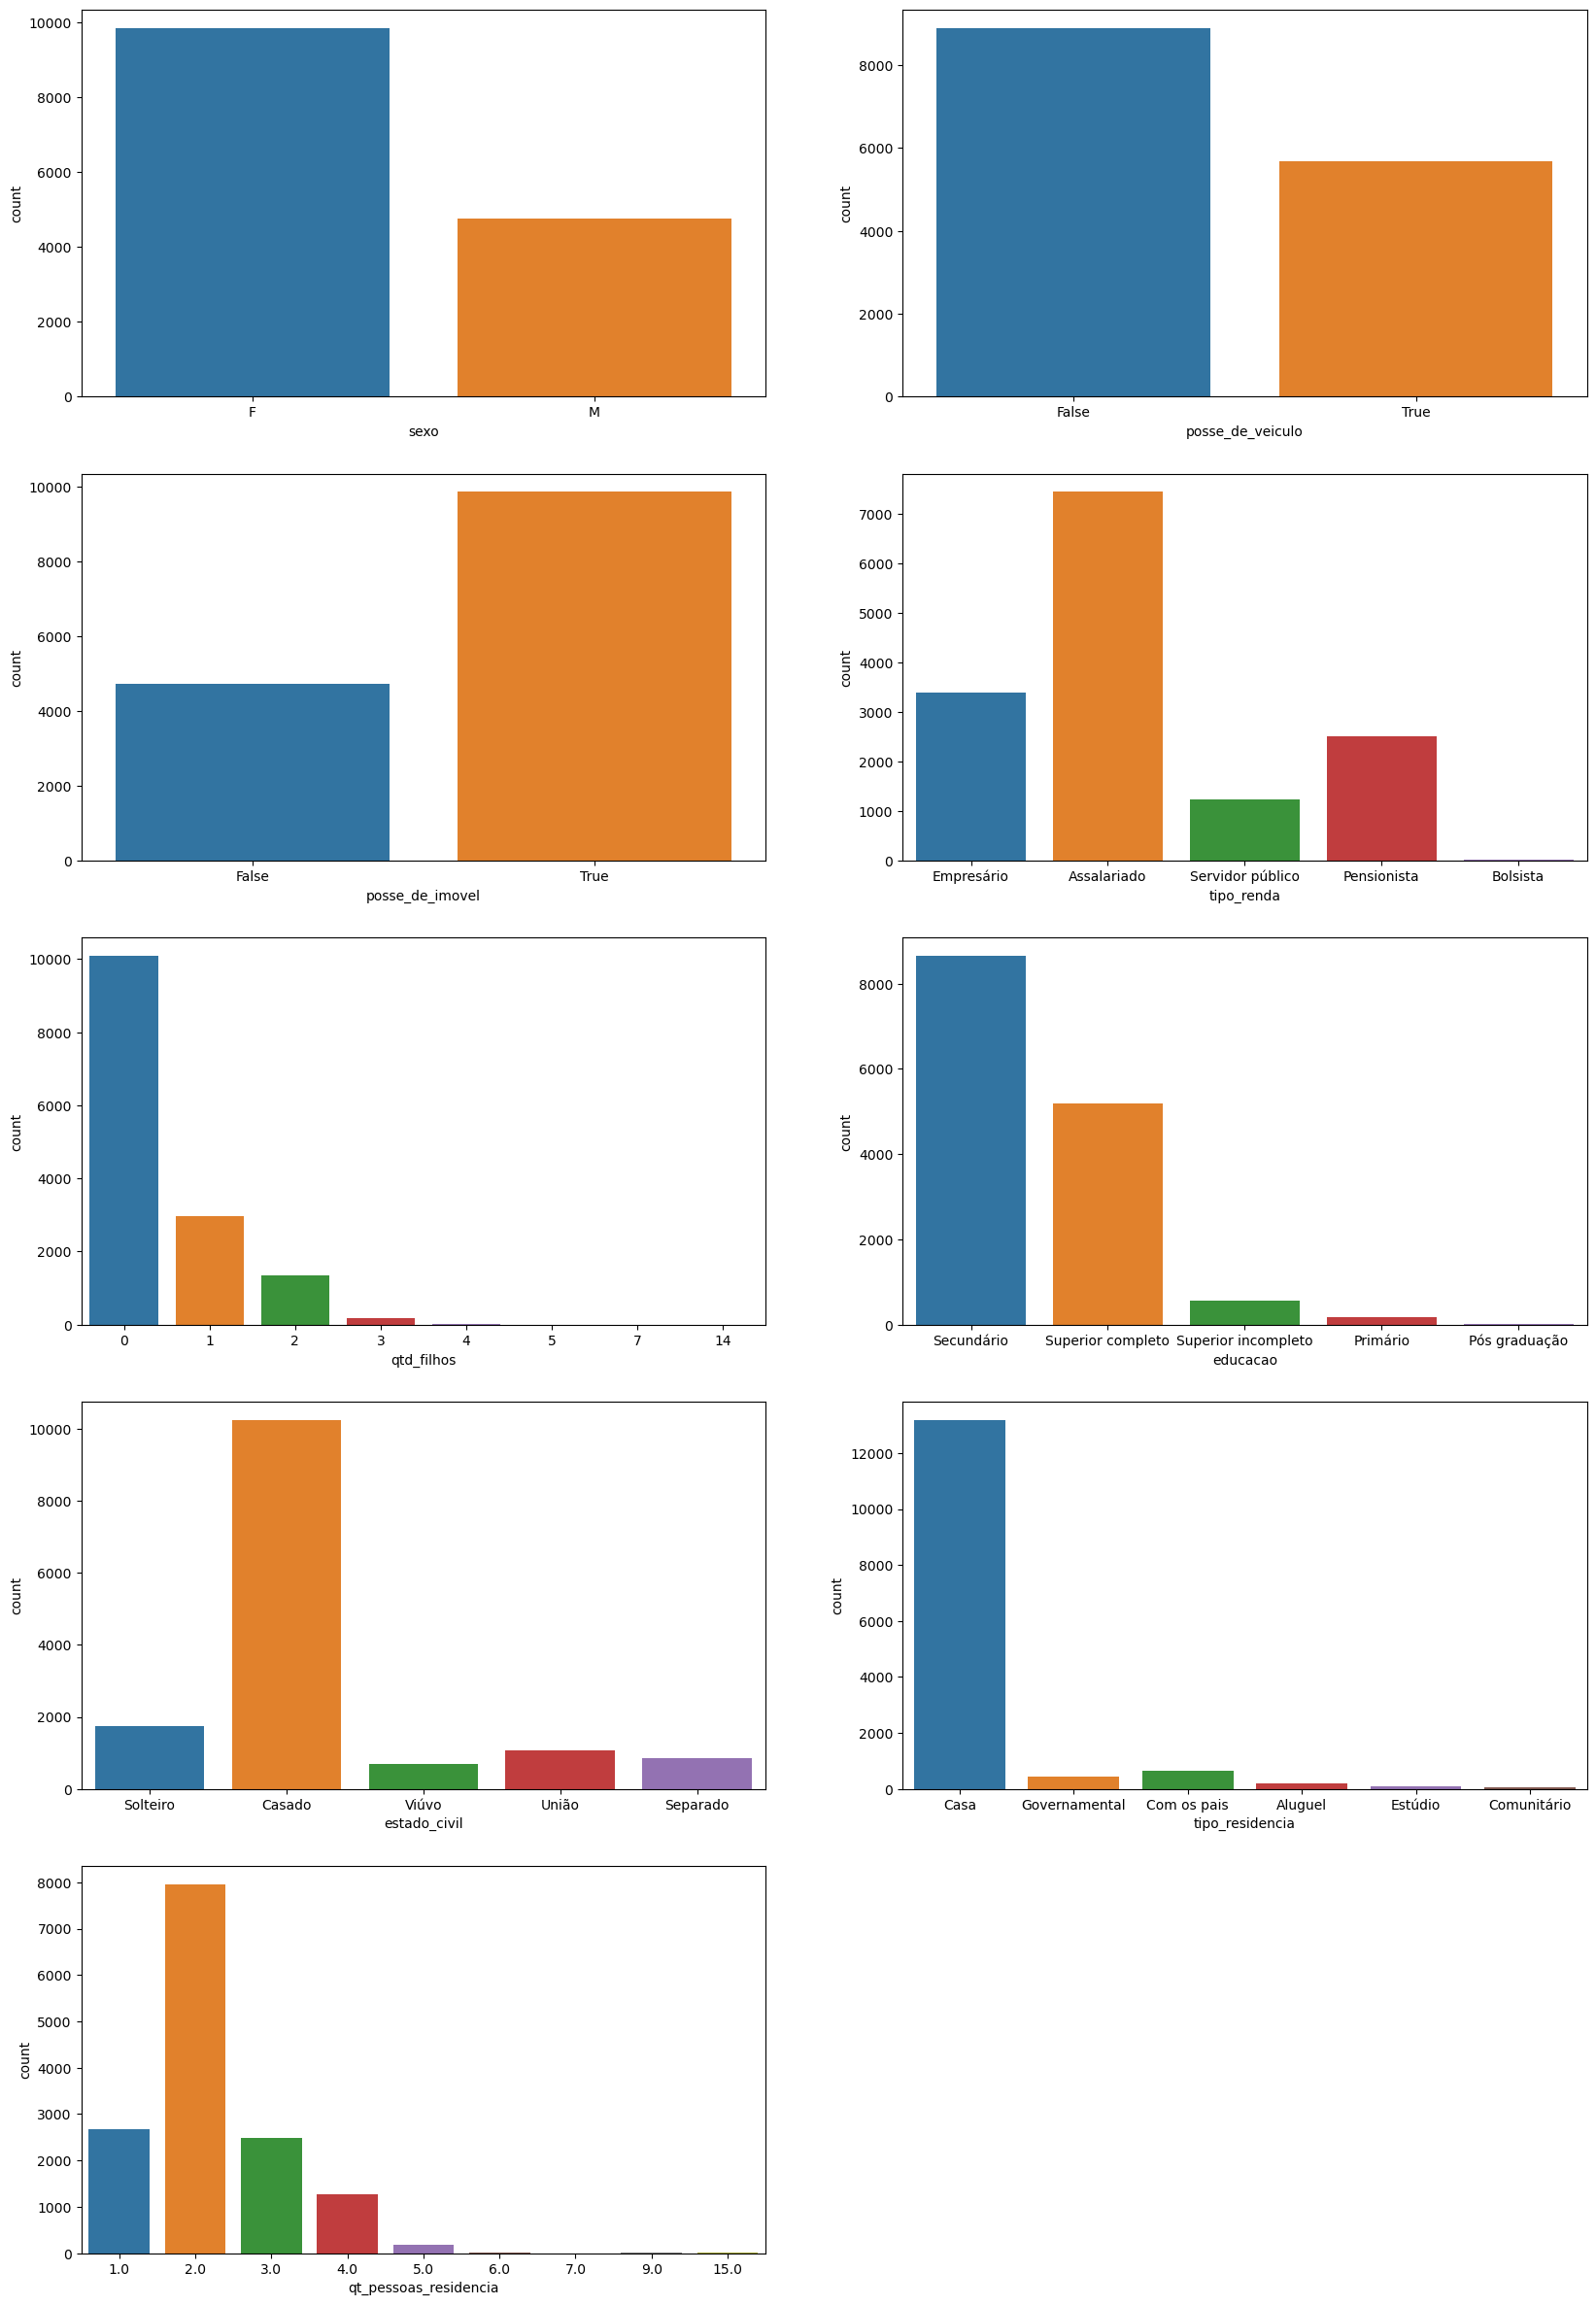

In [309]:
# avaliar distribuição de variáveis qualitativas e discretas por meio de gráficos de barra

plt.rc('figure', figsize=(20, 30))
fig, axes = plt.subplots(5, 2)

sns.countplot(ax = axes[0, 0], x='sexo', data=renda)
sns.countplot(ax = axes[0, 1], x='posse_de_veiculo', data=renda)
sns.countplot(ax = axes[1, 0], x='posse_de_imovel', data=renda)
sns.countplot(ax = axes[1, 1], x='tipo_renda', data=renda)
sns.countplot(ax = axes[2, 0], x='qtd_filhos', data=renda)
sns.countplot(ax = axes[2, 1], x='educacao', data=renda)
sns.countplot(ax = axes[3, 0], x='estado_civil', data=renda)
sns.countplot(ax = axes[3, 1], x='tipo_residencia', data=renda)
sns.countplot(ax = axes[4, 0], x='qt_pessoas_residencia', data=renda)


plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.axis('off')

<Axes: xlabel='renda', ylabel='Count'>

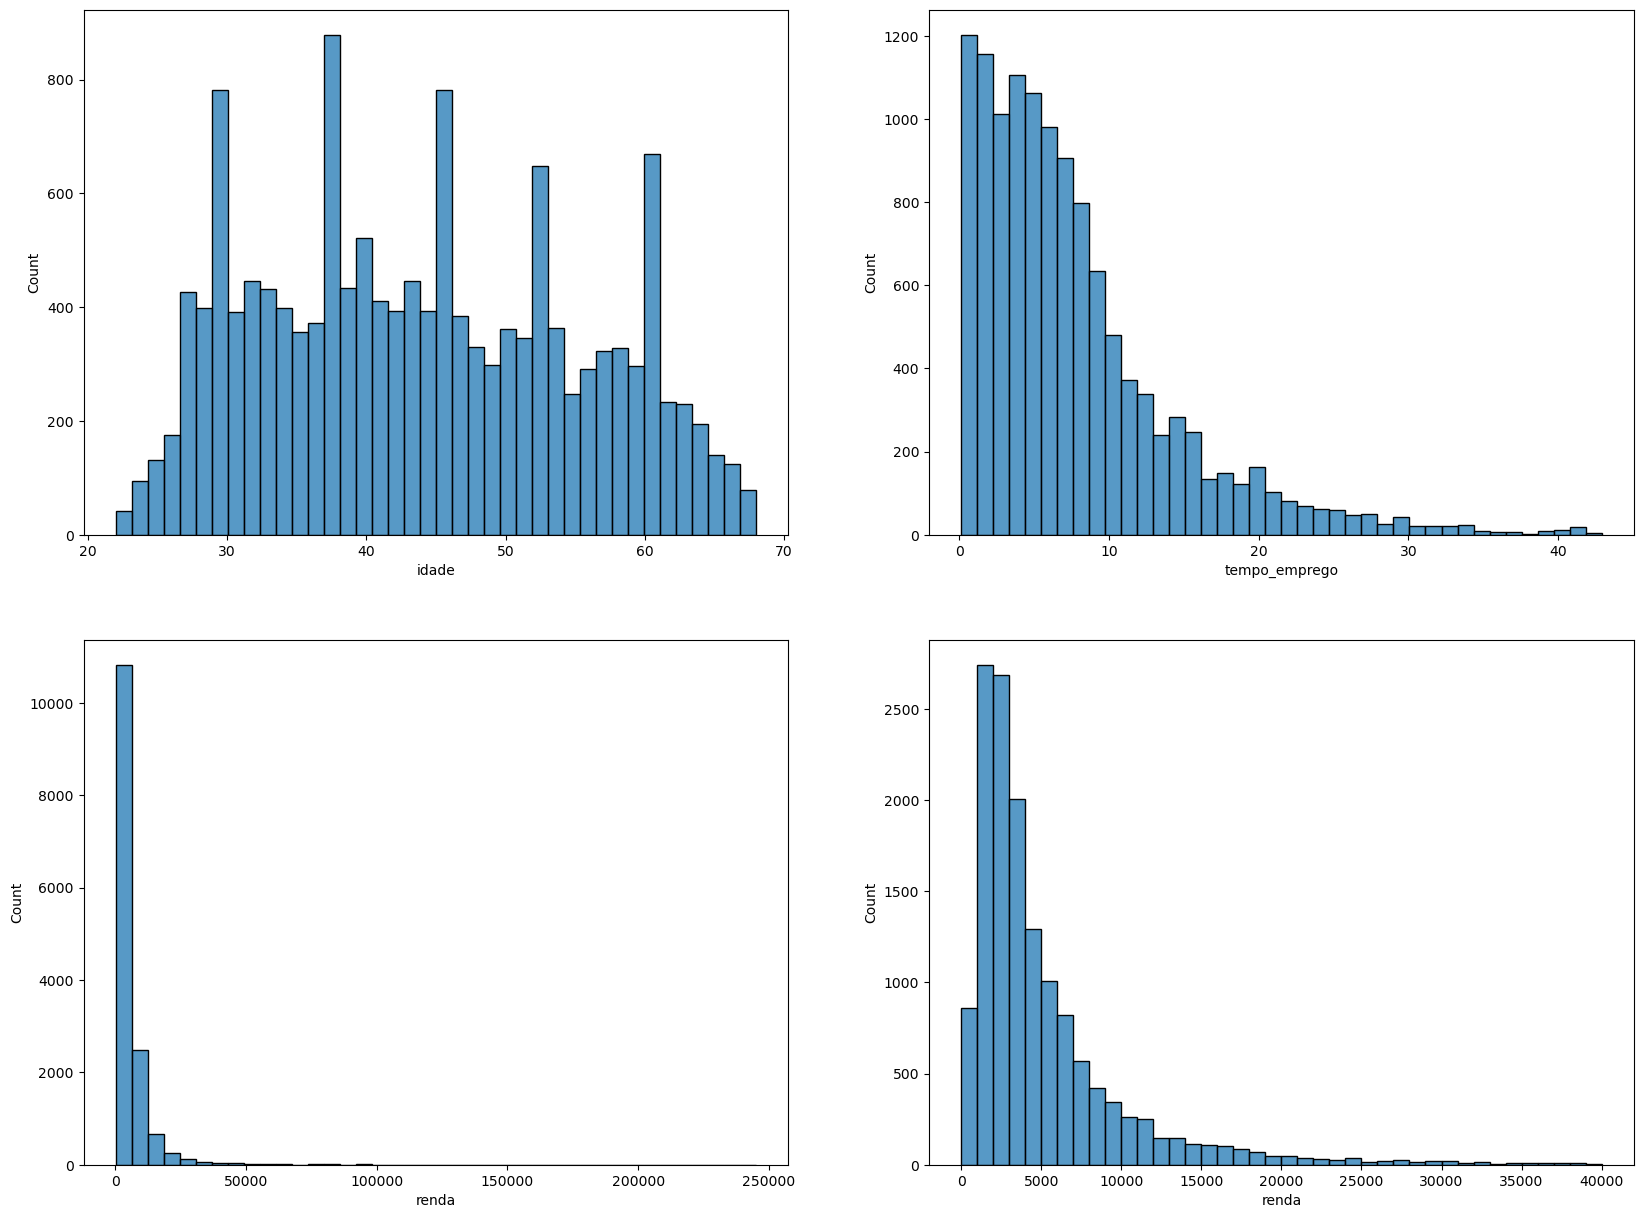

In [159]:
# avaliar distribuição de variáveis contínuas por meio de histogramas

plt.rc('figure', figsize=(20, 15))
fig, axes = plt.subplots(2, 2)

sns.histplot(ax = axes[0, 0], x='idade', data=renda, bins = 40) 
sns.histplot(ax = axes[0, 1], x='tempo_emprego', data=renda, bins = 40)
sns.histplot(ax = axes[1, 0], x='renda', data=renda, bins = 40)
sns.histplot(ax = axes[1, 1], x='renda', data=renda, bins = 40, binrange=[0, 40000])

# plotei um histograma a mais de renda sem os maiores valores, para que a visualização seja melhor

In [173]:
# estatísticas das variáveis quantitativas 

renda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_cliente,14593.0,8308.722812,4795.087165,1.000000,4197.000000,8309.000000,12407.000000,16649.000000
qtd_filhos,14593.0,0.433290,0.746029,0.000000,0.000000,0.000000,1.000000,14.000000
idade,14593.0,43.868910,11.276626,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12090.0,7.724567,6.718007,0.117808,3.006164,6.013699,10.123288,42.906849
qt_pessoas_residencia,14593.0,2.207086,0.909117,1.000000,2.000000,2.000000,3.000000,15.000000
renda,14593.0,5698.140557,8314.021152,118.710000,2018.880000,3488.410000,6379.570000,245141.670000


In [162]:
# geração de relatório com dados estatísticos sobre todas as variáveis 

prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Render HTML: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.64it/s]


In [163]:
# salvar relatório

prof.to_file('./output/renda_analisys.html')

Export report to file: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 177.56it/s]


### Entendimento dos dados - Bivariadas




Nessa etapa observamos as relações entre variáveis.

In [174]:
# matriz de correlação entre as variáveis 

renda.corr()

/var/folders/6d/zj4dzyrs16gb3l_wpf9ffyx00000gn/T/ipykernel_48981/2353465913.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  renda.corr()


,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
id_cliente,1.000000,-0.009105,-0.102887,0.028967,-0.057750,-0.035819,0.037097,-0.007309
posse_de_veiculo,-0.009105,1.000000,-0.013238,0.120952,-0.178247,-0.074186,0.169019,0.099418
posse_de_imovel,-0.102887,-0.013238,1.000000,-0.021670,0.141139,0.011015,-0.022050,0.004188
qtd_filhos,0.028967,0.120952,-0.021670,1.000000,-0.360361,-0.063588,0.889449,0.030296
idade,-0.057750,-0.178247,0.141139,-0.360361,1.000000,0.321970,-0.339365,0.023445
tempo_emprego,-0.035819,-0.074186,0.011015,-0.063588,0.321970,1.000000,-0.067115,0.385014
qt_pessoas_residencia,0.037097,0.169019,-0.022050,0.889449,-0.339365,-0.067115,1.000000,0.048616
renda,-0.007309,0.099418,0.004188,0.030296,0.023445,0.385014,0.048616,1.000000


A variável que mais está relacionada com inadimplência seria a renda do cliente (possivelmente). Nenhuma variável apresenta grande correlação com ``renda``, contudo a que apresenta a maior correlação (cerca de 38%) é ``tempo_emprego``.

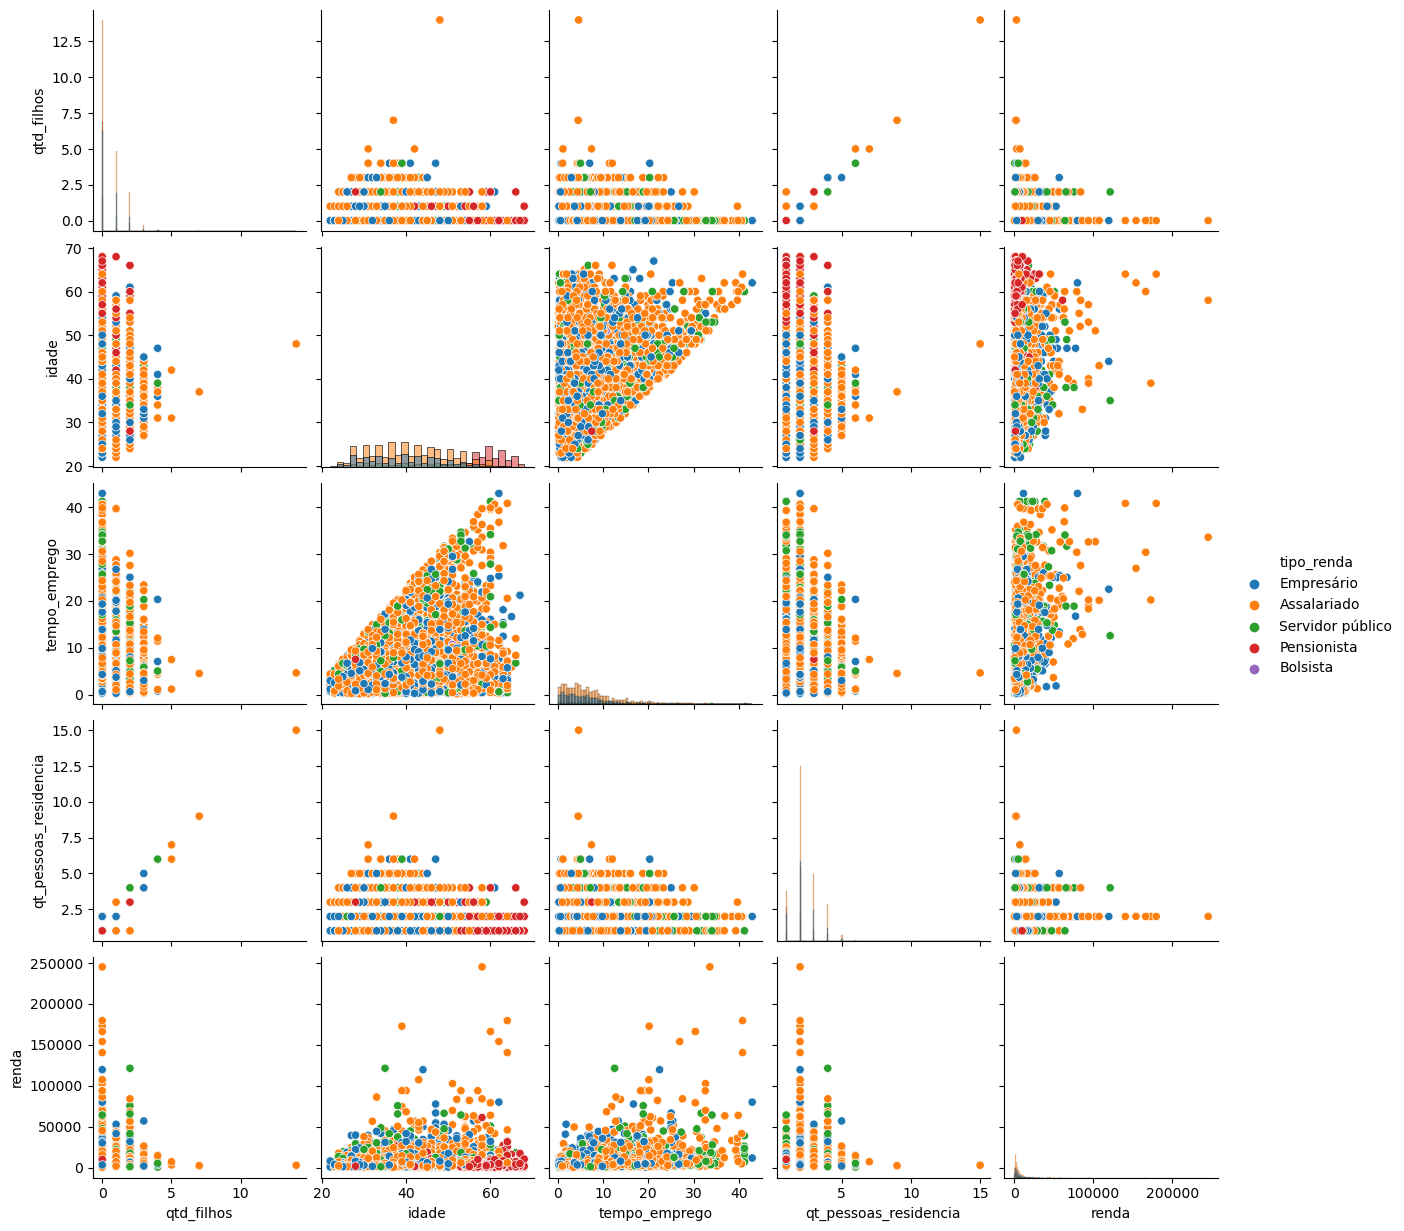

In [180]:
# matriz de dispersão com variáveis quantitativas 

sns.pairplot(data=renda, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'], 
             diag_kind='hist')

plt.show()

A matriz de dispersão reforça a matriz de correlação, mostrando que nenhuma variável apresenta grande correlação com ``renda``. 

<Axes: xlabel='tempo_emprego', ylabel='renda'>

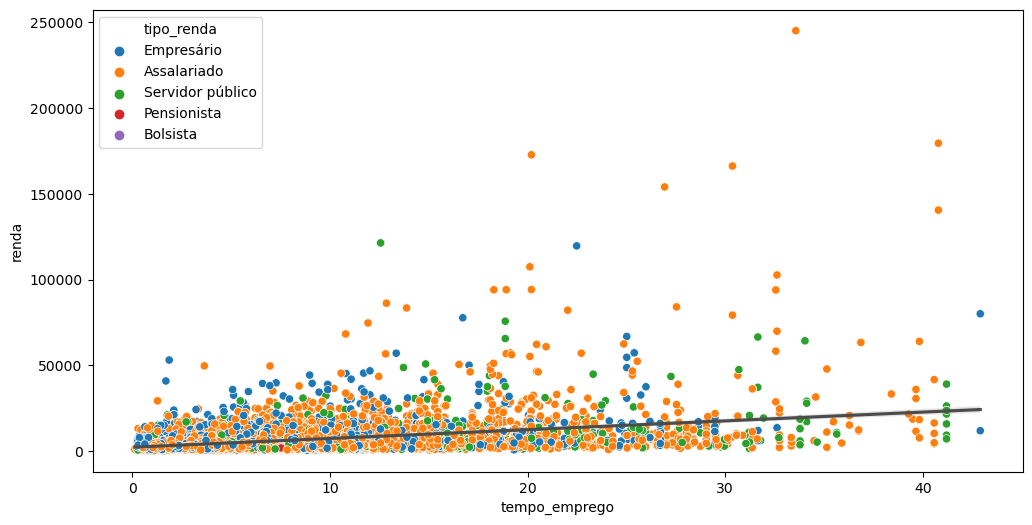

In [190]:
# gráfico de dispersão entre renda e tempo_emprego

plt.rc('figure', figsize=(12, 6))
sns.scatterplot(data=renda, x='tempo_emprego', y='renda', hue='tipo_renda')

# linhda de tendência
sns.regplot(data=renda, x='tempo_emprego', y='renda', scatter=False, color='.3')

É possível observar que existe uma covariância positiva, mesmo que a correlação não seja, de fato, alta. Além disso, observa-se, também, alguns outliers em ``renda``. 

(0.0, 1.0, 0.0, 1.0)

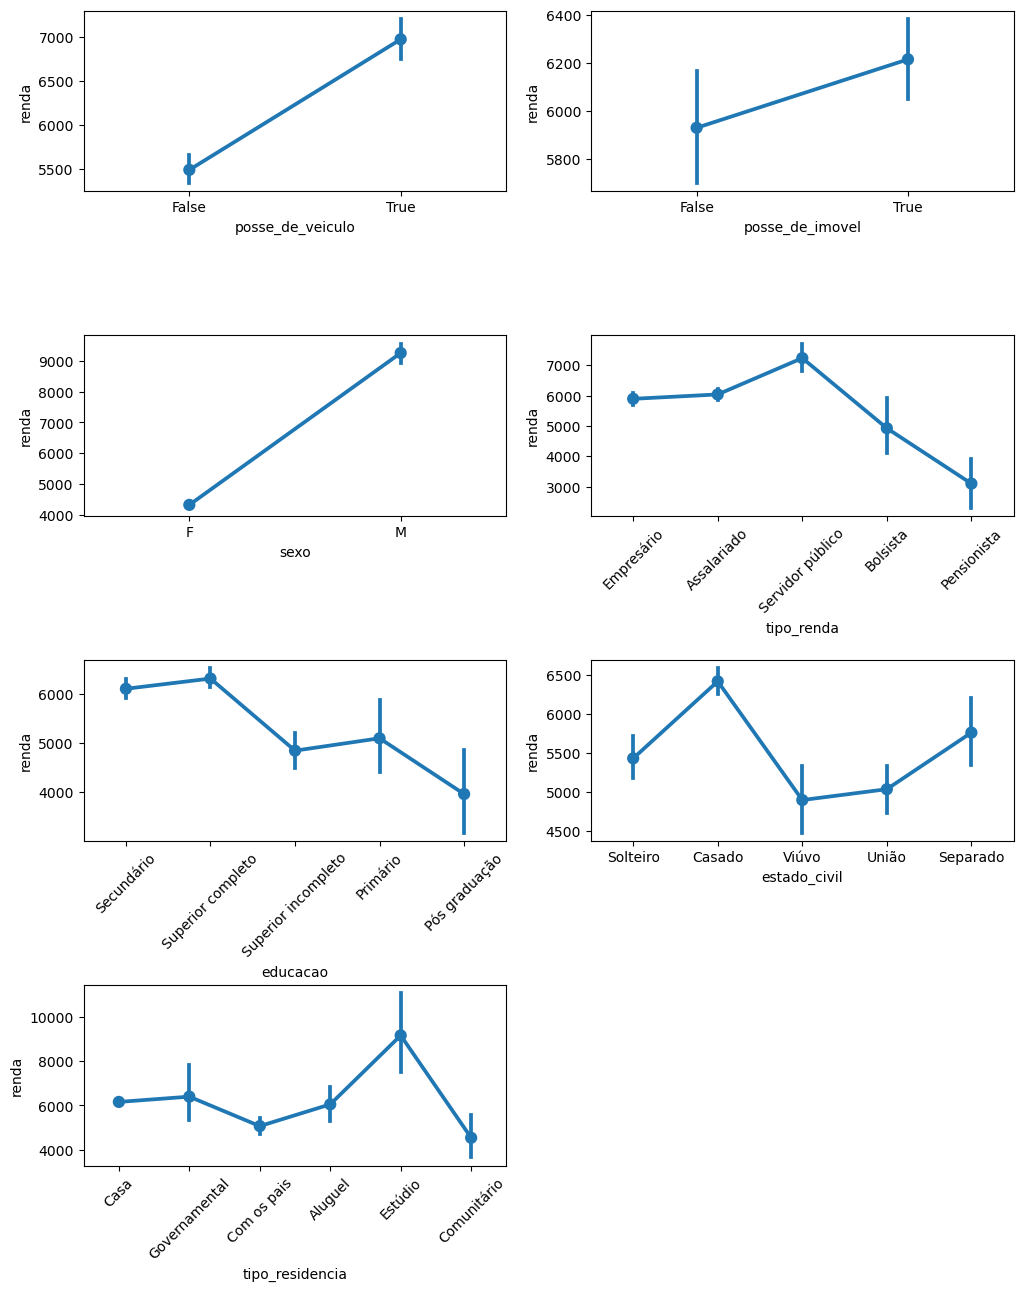

In [235]:
# análise das variáveis qualitativas 

plt.rc('figure', figsize=(12, 15))
fig, axes = plt.subplots(4, 2)

sns.pointplot(ax= axes [0,0], x='posse_de_veiculo', y='renda', data=renda, dodge=True, errorbar = ('ci', 90))
sns.pointplot(ax= axes [0,1], x='posse_de_imovel', y='renda', data=renda, dodge=True, errorbar = ('ci', 90))
sns.pointplot(ax= axes [1,0], x='sexo', y='renda', data=renda, dodge=True, errorbar = ('ci', 90))
sns.pointplot(ax= axes [1,1], x='tipo_renda', y='renda', data=renda, dodge=True, errorbar = ('ci', 90))
sns.pointplot(ax= axes [2,0], x='educacao', y='renda', data=renda, dodge=True, errorbar = ('ci', 90))
sns.pointplot(ax= axes [2,1], x='estado_civil', y='renda', data=renda, dodge=True, errorbar = ('ci', 90))
sns.pointplot(ax= axes [3,0], x='tipo_residencia', y='renda', data=renda, dodge=True, errorbar = ('ci', 90))


axes[1,1].tick_params(axis="x", rotation=45)
axes[2,0].tick_params(axis="x", rotation=45)
axes[3,0].tick_params(axis="x", rotation=45)
plt.subplots_adjust(wspace=0.2, hspace=0.8)
plt.axis('off')

Os gráficos acima mostram que as variáveis ``posse_de_veiculo``, ``sexo``, ``tipo_renda`` (servidor público), ``estado_civil`` (casado) e ``tipo_residencia`` (estúdio) parecem apresentar um valor preditivo relevate em relação a ``renda``.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [310]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14593 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   id_cliente             14593 non-null  int64  
 2   sexo                   14593 non-null  object 
 3   posse_de_veiculo       14593 non-null  bool   
 4   posse_de_imovel        14593 non-null  bool   
 5   qtd_filhos             14593 non-null  int64  
 6   tipo_renda             14593 non-null  object 
 7   educacao               14593 non-null  object 
 8   estado_civil           14593 non-null  object 
 9   tipo_residencia        14593 non-null  object 
 10  idade                  14593 non-null  int64  
 11  tempo_emprego          12090 non-null  float64
 12  qt_pessoas_residencia  14593 non-null  float64
 13  renda                  14593 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

É necessário passar algumas variáveis para formato numérico e eliminar dados faltantes. 

In [311]:
#retirar dados faltantes
renda = renda.dropna()
renda.isna().sum()

data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [312]:
# retirar variáveis que não serão utilizadas

renda = renda.drop(['data_ref', 'id_cliente'], axis=1)
renda.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [314]:
renda.tempo_emprego.sort_values()

548       0.117808
10508     0.117808
2574      0.178082
7084      0.178082
14428     0.178082
           ...    
8057     41.200000
11309    41.200000
12734    42.906849
5883     42.906849
11730    42.906849
Name: tempo_emprego, Length: 12090, dtype: float64

In [315]:
# modificar o tipo das variáveis qualitativas

renda_final = pd.get_dummies(renda)
renda_final.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
renda                            float64
sexo_F                             uint8
sexo_M                             uint8
tipo_renda_Assalariado             uint8
tipo_renda_Bolsista                uint8
tipo_renda_Empresário              uint8
tipo_renda_Pensionista             uint8
tipo_renda_Servidor público        uint8
educacao_Primário                  uint8
educacao_Pós graduação             uint8
educacao_Secundário                uint8
educacao_Superior completo         uint8
educacao_Superior incompleto       uint8
estado_civil_Casado                uint8
estado_civil_Separado              uint8
estado_civil_Solteiro              uint8
estado_civil_União                 uint8
estado_civil_Viúvo                 uint8
tipo_residencia_

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Para construir um modelo de previsão de renda a técnica escolhida foi uma análise de regressão múltipla. 

### Rodando o modelo


A variável resposta é ``renda`` e as variáveis explicativas foram escolhidas com base nos gráficos acima: ``tempo_emprego``, ``posse_de_veiculo``, ``sexo``, ``tipo_renda`` (servidor público), ``estado_civil`` (casado) e ``tipo_residencia`` (estúdio).

In [316]:
# dividir dados entre base de treino e teste

renda_train, renda_test = train_test_split(renda_final, test_size=0.3, random_state=100)
renda_train.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,tipo_renda_Assalariado,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
11019,False,True,0,53,5.764384,1.0,5135.91,1,0,1,...,1,0,0,0,0,1,0,0,0,0
6135,True,True,0,37,12.019178,2.0,32693.62,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9765,False,True,0,50,6.687671,1.0,3518.44,1,0,0,...,0,1,0,0,0,1,0,0,0,0
9344,False,False,0,35,11.772603,1.0,1783.12,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2065,False,True,0,50,1.747945,2.0,5109.17,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [317]:
renda_train.rename(columns={'tipo_renda_Servidor público': 'tipo_renda_Servidor_publico'}, 
                 inplace=True)



# rodar o modelo de regressão múltipla

reg = smf.ols('''renda ~ posse_de_veiculo 
                        + sexo_M
                        + tempo_emprego
                        + tipo_renda_Servidor_publico
                        + estado_civil_Casado
                        + tipo_residencia_Estúdio''', renda_train).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     491.5
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:37:49   Log-Likelihood:                -87559.
No. Observations:                8463   AIC:                         1.751e+05
Df Residuals:                    8456   BIC:                         1.752e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    -695.4225    195.396     -3.559      0.000   -1078.446    -312.398
posse_de_veiculo[T.True]      105.1297    177.884      0.591      0.555    -243.566     453.825
sexo_M                       5937.1817    183.749     32.311      0.000    5576.989    6297.374
tempo_emprego                 559.9708     12.273     45.626      0.000     535.913     584.029
tipo_renda_Servidor_publico  -185.0918    271.668     -0.681      0.496    -717.627     347.443
estado_civil_Casado           398.5284    183.490      2.172      0.030      38.843     758.214
tipo_residencia_Estúdio      1614.2313   1129.488      1.429      0.153    -599.841    3828.304
==============================================================================
Omnibus:                    10469.911   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2600256.536
Skew:                           6.514   Prob(JB):                         0.00
Kurtosis:                      87.878   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

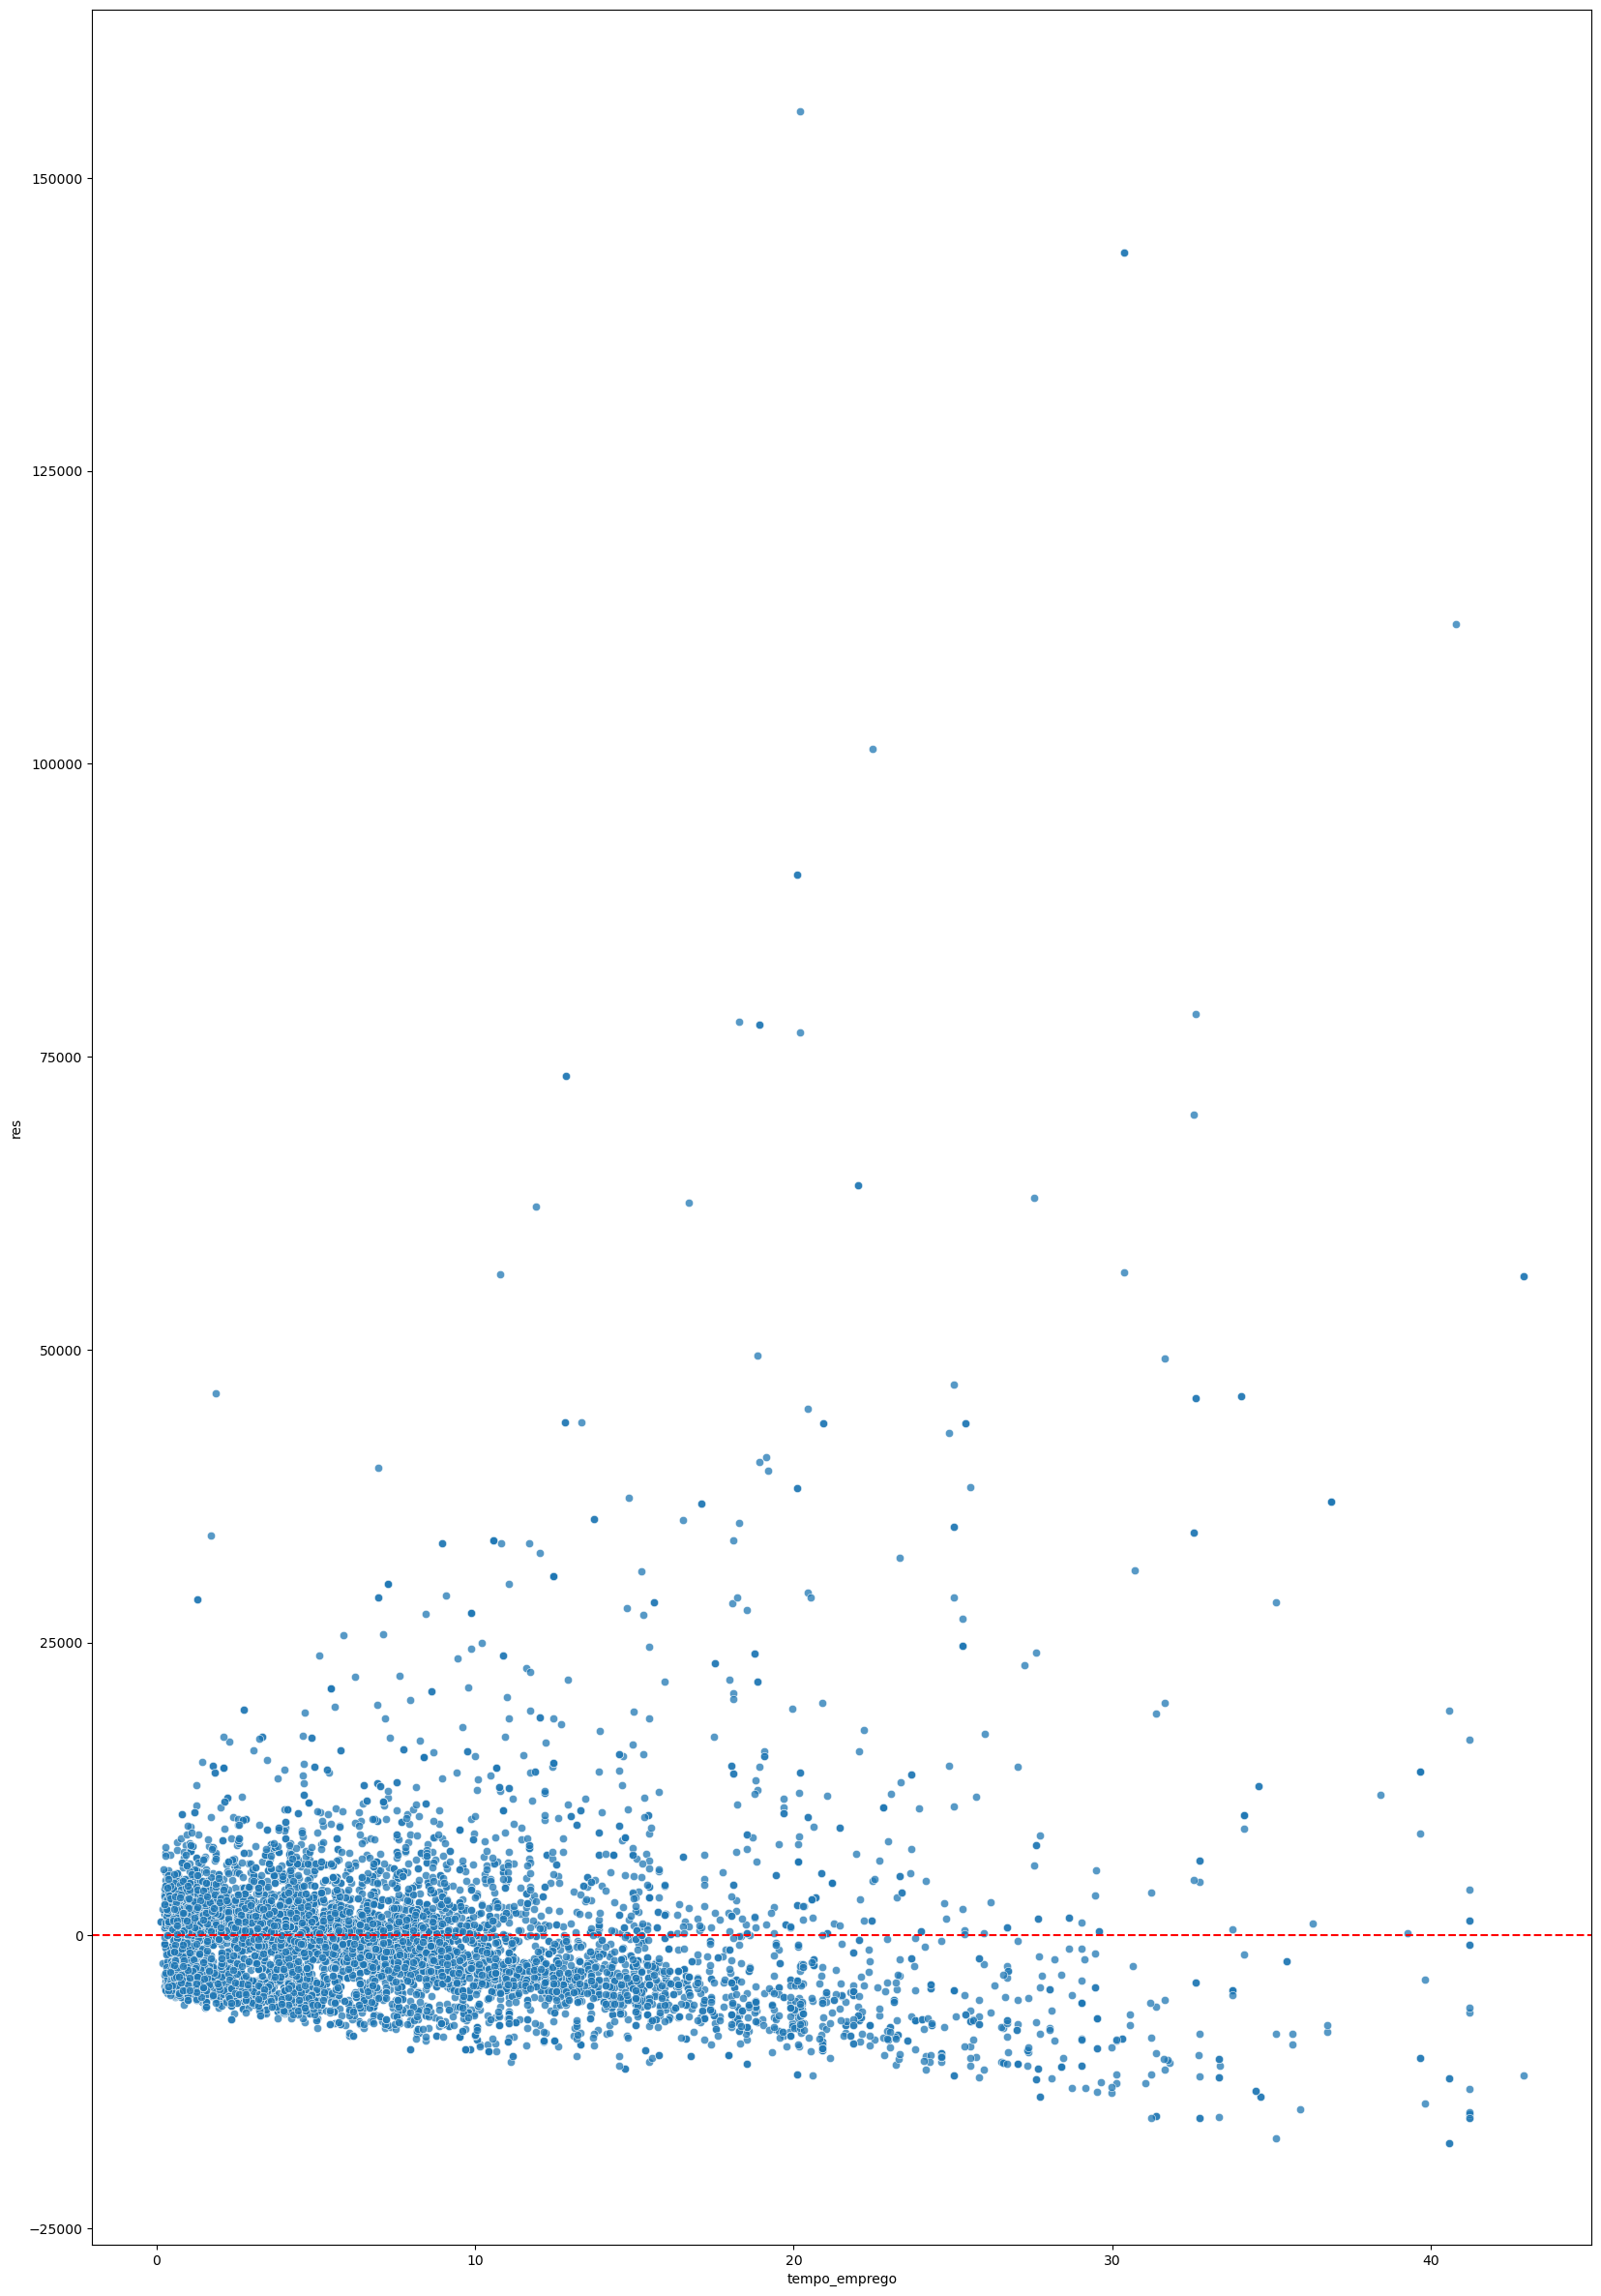

In [318]:
# análise de resíduos 

renda_train['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = renda_train, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [319]:
# rodar o modelo de regressão múltipla tranformando renda em log

reg_log = smf.ols('''np.log(renda) ~ posse_de_veiculo 
                                   + sexo_M
                                   + tempo_emprego
                                   + tipo_renda_Servidor_publico
                                   + estado_civil_Casado
                                   + tipo_residencia_Estúdio''', renda_train).fit()

reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     715.4
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:38:02   Log-Likelihood:                -9360.6
No. Observations:                8463   AIC:                         1.874e+04
Df Residuals:                    8456   BIC:                         1.878e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.4848      0.019    394.591      0.000       7.448       7.522
posse_de_veiculo[T.True]        0.0382      0.017      2.214      0.027       0.004       0.072
sexo_M                          0.7622      0.018     42.729      0.000       0.727       0.797
tempo_emprego                   0.0615      0.001     51.610      0.000       0.059       0.064
tipo_renda_Servidor_publico     0.0193      0.026      0.732      0.464      -0.032       0.071
estado_civil_Casado             0.0141      0.018      0.794      0.427      -0.021       0.049
tipo_residencia_Estúdio         0.2075      0.110      1.893      0.058      -0.007       0.422
==============================================================================
Omnibus:                        1.003   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.968
Skew:                           0.023   Prob(JB):                        0.616
Kurtosis:                       3.025   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
# não podemos comparar r2 com o inicial, por causa do log

renda_train['pred_y'] = np.exp(reg_log.fittedvalues)

r = renda_train[['pred_y', 'renda']].corr().iloc[0,1]    # calcular r2 por meio da correlação (r)
r2 = r ** 2
r2

0.3608229044223306

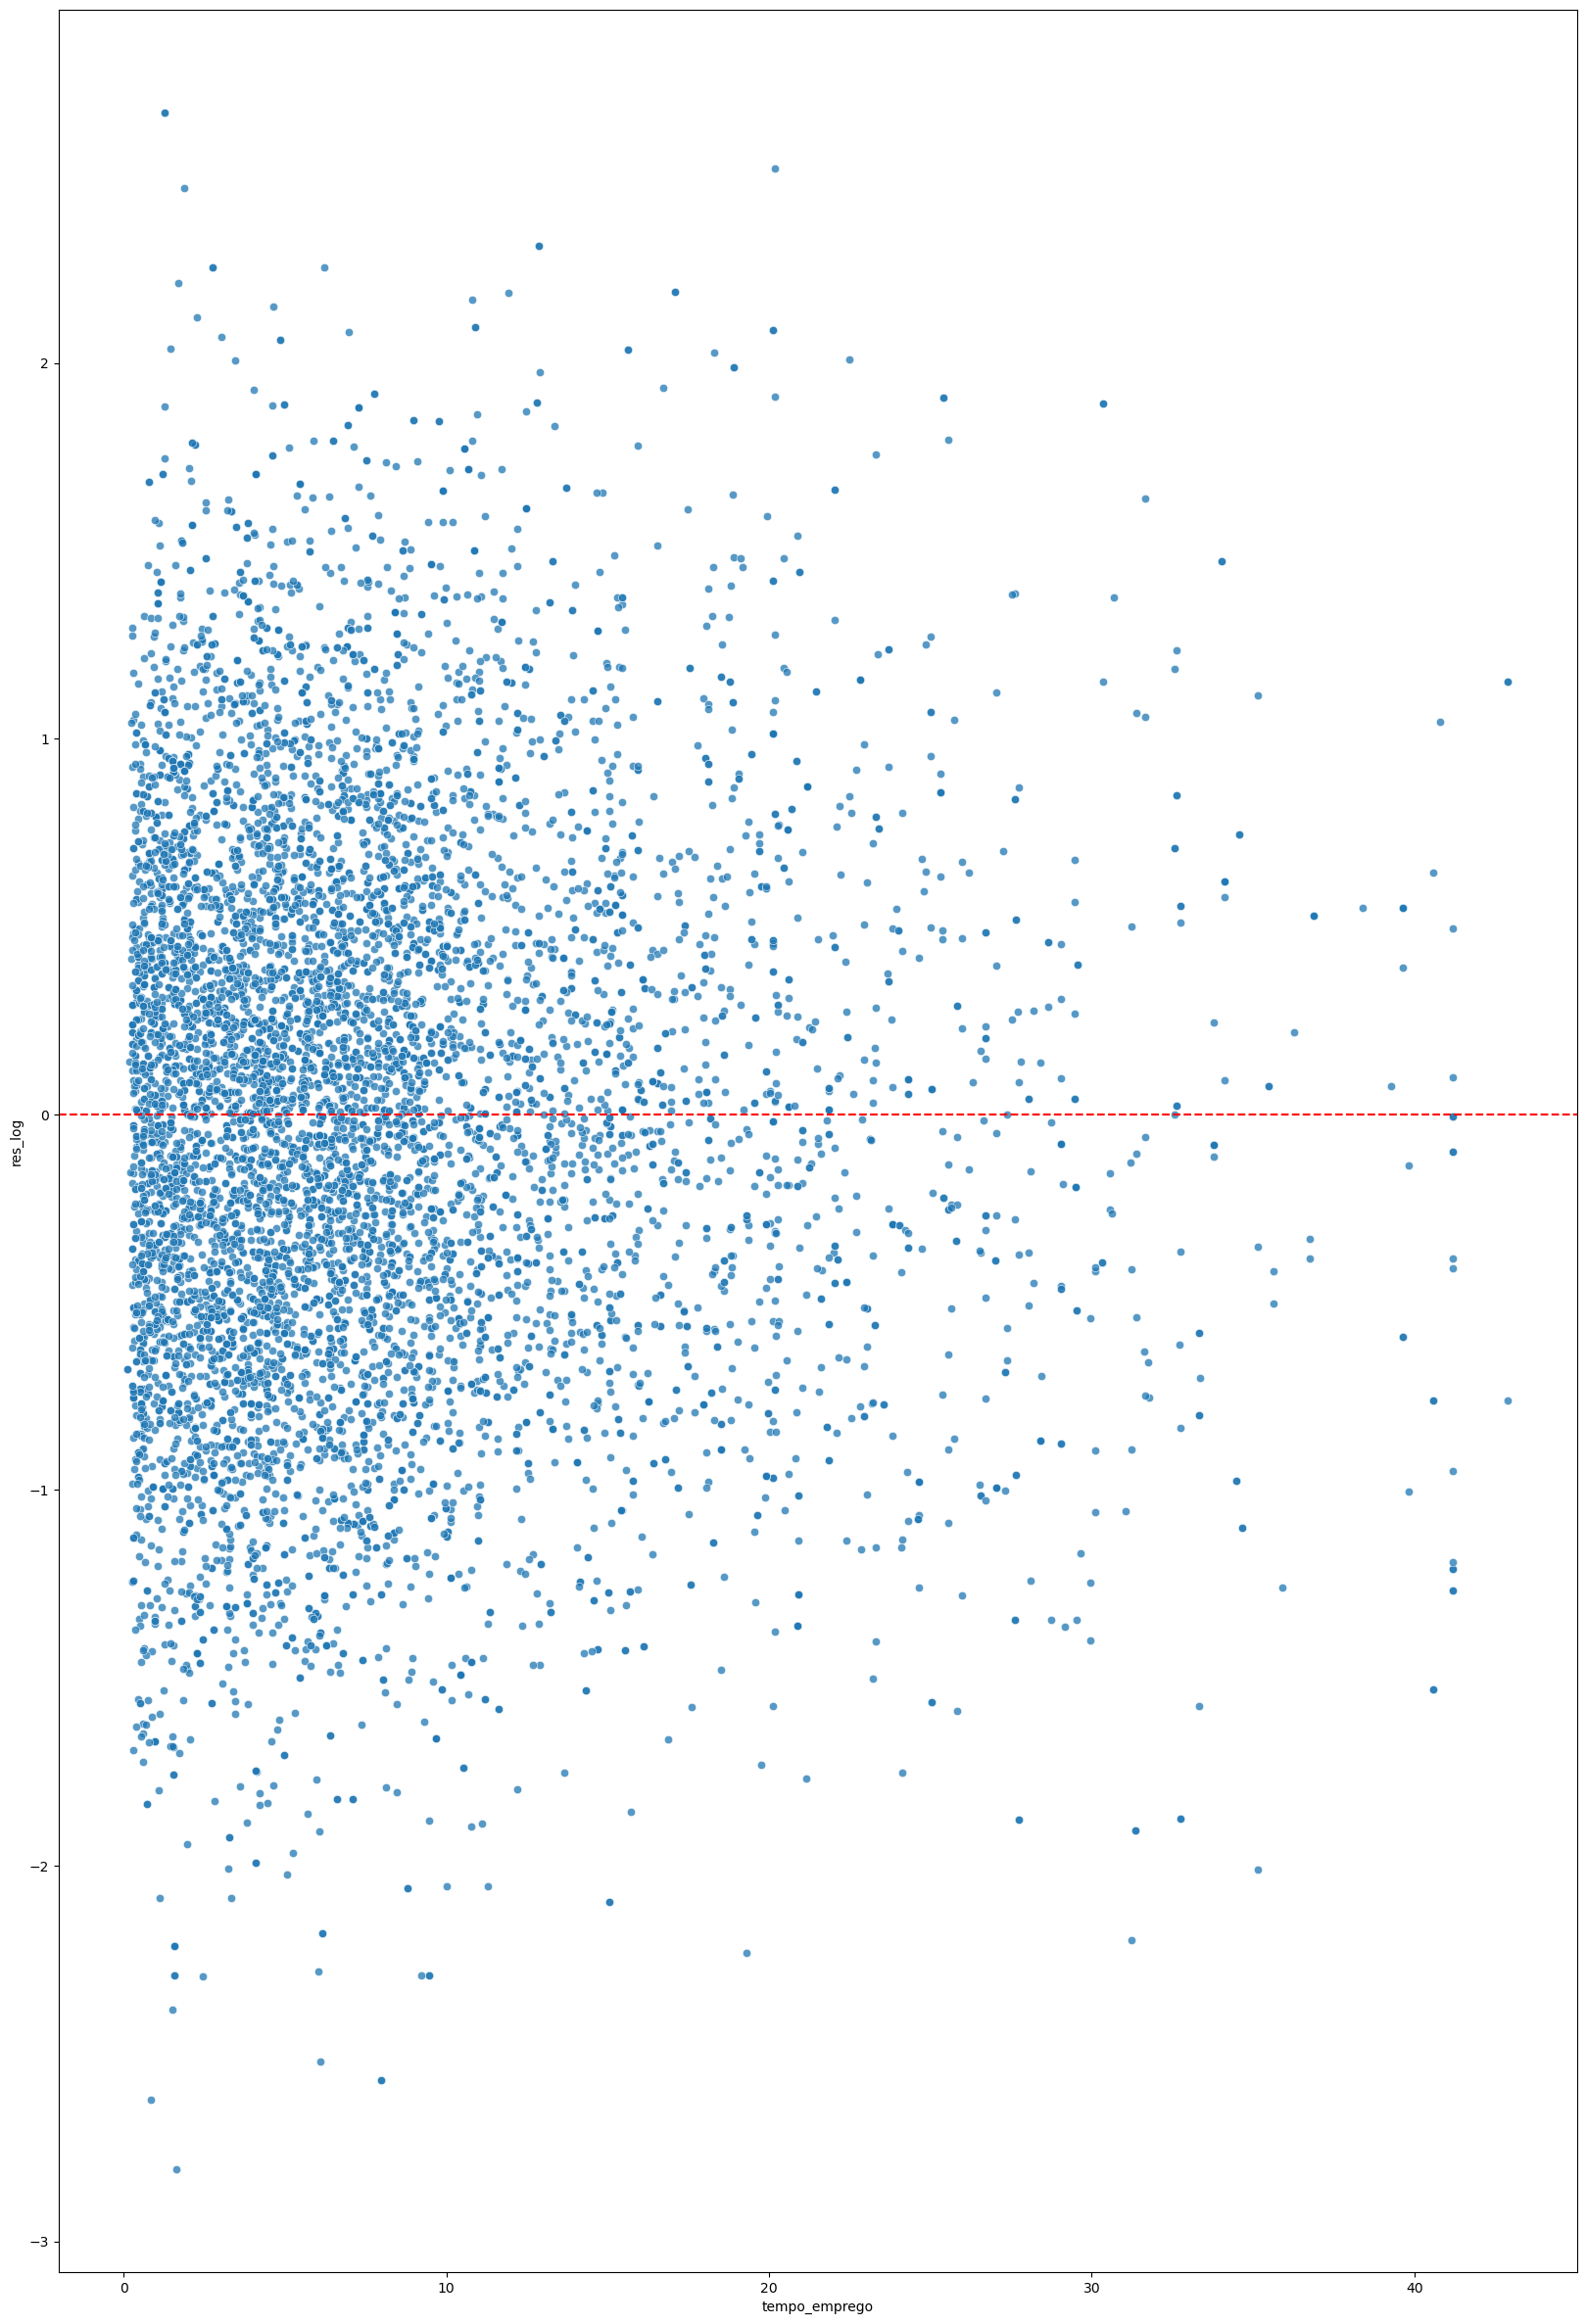

In [321]:
# análise de resíduos 

renda_train['res_log'] = reg_log.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res_log', data = renda_train, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Testei dois modelos de regressão múltipla, com a diferença da transformação de renda em log. O modelo com log apresentou coeficiente de determinação maior e o gráfico de resíduos também ficou melhor. 

## Etapa 5 Crisp-DM: Avaliação dos resultados


Para avaliar o modelo, rodamos na base de teste.

In [322]:
renda_test.rename(columns={'tipo_renda_Servidor público': 'tipo_renda_Servidor_publico'}, 
                 inplace=True)

# calcular coeficiente de determinação da base de teste 

X_test = renda_test.drop('renda', axis=1)

renda_test['pred'] = reg_log.predict(X_test)  # valores preditos da regressão na base de teste

r = renda_test[['pred', 'renda']].corr().iloc[0,1]    # calcular r2 por meio da correlação (r)
r2 = r ** 2
r2

0.22796186607910882

O coeficiente de determinação para a base de treino foi de 36% e na base de teste foi 23%.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [323]:
# dataframe com valores simulados de um futuro cliente

entrada = pd.DataFrame([{'sexo_M': 1, 
                         'posse_de_veiculo': 1, 
                         'posse_de_imovel': 1, 
                         'qtd_filhos': 1, 
                         'tipo_renda_Servidor_publico': 1,  
                         'estado_civil_Casado': 1, 
                         'tipo_residencia_Estúdio': 1, 
                         'idade': 34, 
                         'tempo_emprego': 7.183562, 
                         'qt_pessoas_residencia': 5}])

entrada

,sexo_M,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda_Servidor_publico,estado_civil_Casado,tipo_residencia_Estúdio,idade,tempo_emprego,qt_pessoas_residencia
0,1,1,1,1,1,1,1,34,42.906849,5


In [338]:
# usar o modelo para simular a renda desse cliente 

renda_pred = np.exp(reg_log.predict(entrada)) # como o modelo considera log de renda, usar exp para ter valor real
print(f"Renda estimada: R${str(np.round(renda_pred[0], 2)).replace('.', ',')}")

Renda estimada: R$70585,85
